In [ ]:
!sudo apt-get update
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

import gym
from gym.wrappers import Monitor
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [ ]:
display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment 
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [ ]:
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
!pip install Box2d

     |████████████████████████████████| 1.3 MB 5.0 MB/s 


In [ ]:
env = gym.make('BipedalWalker-v3')	
env = wrap_env(env)
state_size = env.observation_space
print("state size is:", state_size)
print(f"Action Space: {env.action_space}")

state size is: Box(-inf, inf, (24,), float32)
Action Space: Box(-1.0, 1.0, (4,), float32)


/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
#give an initial state
state = env.reset()
#print("state=",state)
state_size = env.observation_space
print("state size is:", state_size)
a = env.action_space
#If your action space is discrete and one dimensional, env.action_space will give you a Discrete object.
print("action size=",a)    


state size is: Box(-inf, inf, (24,), float32)
action size= Box(-1.0, 1.0, (4,), float32)


In [ ]:
# pick an action
action = env.action_space.sample()
print("action is:",action)
# do an action
observation, reward, done, info = env.step(action)
#print("observation is:",observation)
print("reward is:", reward)
print("done=", done)
print("info is",info)

action is: [-0.11895474 -0.82513493  0.7676565   0.77147317]
reward is: -0.18994290774315598
done= False
info is {}


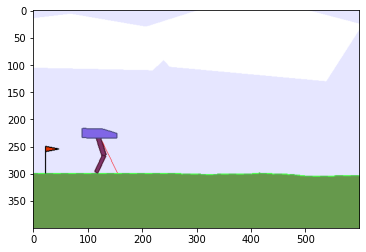

In [ ]:
plt.imshow(env.render('rgb_array'))

In [ ]:
env = gym.make('BipedalWalker-v3')	
env = wrap_env(env)
state = env.reset()
done = False
totalReward = 0
munOfIterations = 0
while not done:
    action=  env.action_space.sample()
    if done:
        #state = env.reset()
        print("total Reward = ", totalReward)

    state, reward, done, info = env.step(action)
    totalReward = + reward
    munOfIterations = munOfIterations+1
    #print("reward = ", reward)
    #screen = env.render(mode='rgb_array')
    #plt.imshow(screen)
    #ipythondisplay.clear_output(wait=True)
    #ipythondisplay.display(plt.gcf())
print("total Reward = ", totalReward)
print("done = ", done)
print("munOfIterations=",munOfIterations)




/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


total Reward =  0.05521891969442367
done =  True
munOfIterations= 1600


In [ ]:
env.close()
show_video()